In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from datetime import datetime
import pandas as pd

In [49]:
df = pd.read_csv('encoded1.csv')
df.head()


alerts=df.Alert.unique().astype(str)
vehicles=df.Vehicle.unique().astype(str)
dates=df.Date.unique()
weekdays=df.Weekday.unique()
days = []
for i in dates:
  days.append(i[5:])
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

In [ ]:
vehicle1 = df[df['Vehicle']==2846]

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ldw = vehicle1[vehicle1['Alert']==1]['Weekday'].value_counts().reindex(order)
fcw = vehicle1[vehicle1['Alert']==3]['Weekday'].value_counts().reindex(order)
pcw = vehicle1[vehicle1['Alert']==4]['Weekday'].value_counts().reindex(order)
hmw = vehicle1[vehicle1['Alert']==2]['Weekday'].value_counts().reindex(order)

In [52]:
ldw = df[df['Alert']==1]
hmw = df[df['Alert']==2]
fcw = df[df['Alert']==3]
pcw = df[df['Alert']==4]

In [56]:
# Chart 1
chart = ldw[['Alert','Hour']]
chart.head()
hourly_alert_counts1 = ldw.groupby('Hour')['Alert'].count().reset_index()
hac1 = hourly_alert_counts1.rename(columns={'Alert': 'Alert Count'})

# Chart 2
chart = hmw[['Alert','Hour']]
chart.head()
hourly_alert_counts2 = hmw.groupby('Hour')['Alert'].count().reset_index()
hac2 = hourly_alert_counts2.rename(columns={'Alert': 'Alert Count'})

# Chart 3
chart = pcw[['Alert','Hour']]
chart.head()
hourly_alert_counts3 = pcw.groupby('Hour')['Alert'].count().reset_index()
hac3 = hourly_alert_counts3.rename(columns={'Alert': 'Alert Count'})

# Chart 4
chart = fcw[['Alert','Hour']]
chart.head()
hourly_alert_counts4 = fcw.groupby('Hour')['Alert'].count().reset_index()
hac4 = hourly_alert_counts4.rename(columns={'Alert': 'Alert Count'})


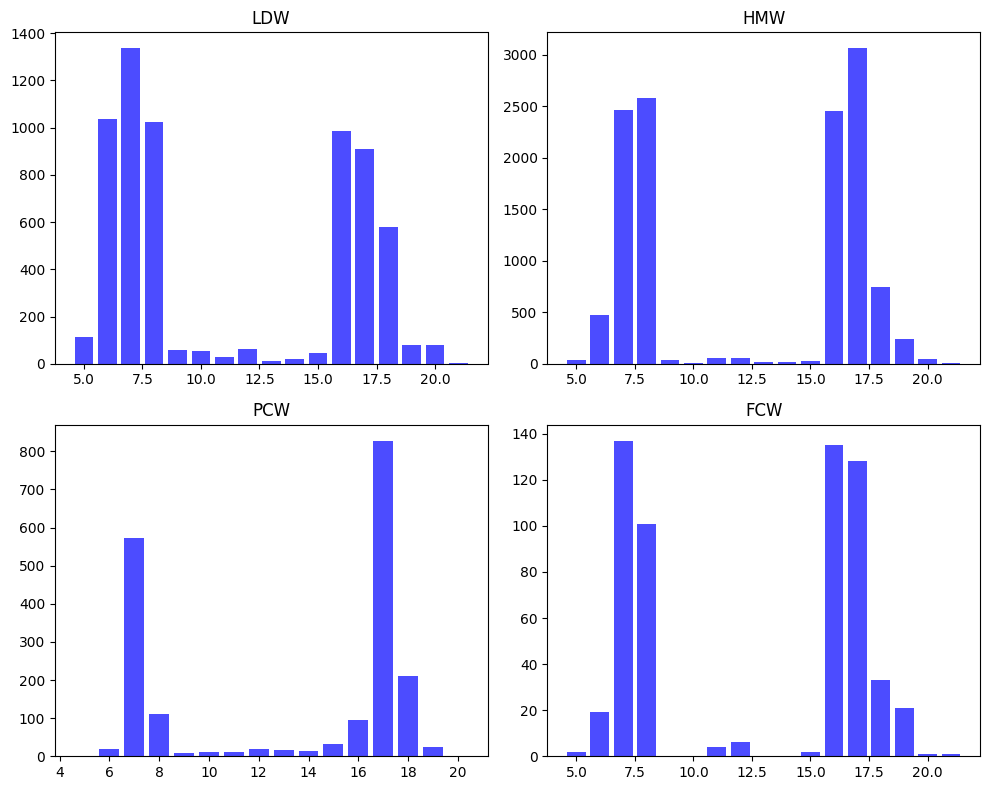

In [57]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot data in each subplot
axes[0, 0].bar(hac1['Hour'], hac1['Alert Count'], color='blue', alpha=0.7)
axes[0, 0].set_title('LDW')

axes[0, 1].bar(hac2['Hour'], hac2['Alert Count'], color='blue', alpha=0.7)
axes[0, 1].set_title('HMW')

axes[1, 0].bar(hac3['Hour'], hac3['Alert Count'], color='blue', alpha=0.7)
axes[1, 0].set_title('PCW')

axes[1, 1].bar(hac4['Hour'], hac4['Alert Count'], color='blue', alpha=0.7)
axes[1, 1].set_title('FCW')

# Add legends to each subplot
# for ax in axes.flat:
#     ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
